<a href="https://colab.research.google.com/github/SantosCristiano/artificial-intelligence-python/blob/main/04_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow 1

## Aula 16 - Tensor Flow - Redes Neurais - Classificação com DNNClassifier

Trabalharemos com uma base de dados real, é o <strong>Pima Indians Diabetes Database</strong>


Usaremos o classificador de rede neural densa ( <strong>DNNClassifier</strong> )

### Importa o tensorflow

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


## Importa o numpy, o pandas e o matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Leitura dos dados e análise exploratória

In [ ]:
# Nome para a coluna ou mapa de recursos
columns_to_named = ["Pregnancies","Glucose","BloodPressure",
           "SkinThickness","Insulin","BMI","DiabetesPedigreeFunction",
           "Age","Class"]

In [ ]:
# Ler o conjunto de dados e renomeia a coluna
df = pd.read_csv(
    "https://raw.githubusercontent.com/toticavalcanti/pima-indians-diabetes/master/diabetes.csv",
    header = 0,
    names = columns_to_named)

In [ ]:
# Resumo dos dados
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Contagem de valores nulos
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64

                          Pregnancies   Glucose  ...       Age     Class
Pregnancies                  1.000000  0.129459  ...  0.544341  0.221898
Glucose                      0.129459  1.000000  ...  0.263514  0.466581
BloodPressure                0.141282  0.152590  ...  0.239528  0.065068
SkinThickness               -0.081672  0.057328  ... -0.113970  0.074752
Insulin                     -0.073535  0.331357  ... -0.042163  0.130548
BMI                          0.017683  0.221071  ...  0.036242  0.292695
DiabetesPedigreeFunction    -0.033523  0.137337  ...  0.033561  0.173844
Age                          0.544341  0.263514  ...  1.000000  0.238356
Class                        0.221898  0.466581  ...  0.238356  1.000000

[9 rows x 9 columns]


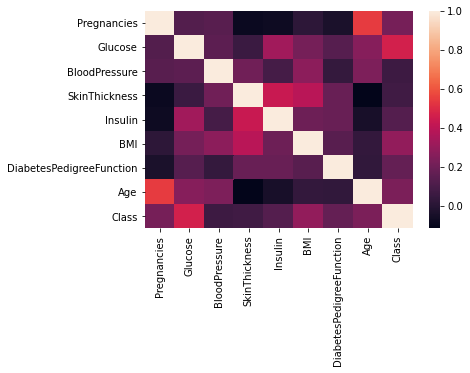

In [ ]:
corr = df.corr()
print(corr)
sns.heatmap(corr,
         xticklabels=corr.columns,
         yticklabels=corr.columns)

No mapa de calor acima, as cores mais brilhantes indicam mais correlação. <br />Como podemos ver na tabela e no mapa de calor, os níveis de glicose, idade, IMC e número de gestações têm correlação significativa com a variável de resultado, <strong>Outcome</strong>, que mudei o nome para <strong>Class</strong>.<br /> Observe também a correlação entre pares de características, como idade e gravidez, ou insulina e espessura da pele.

## Diabéticos e não diabéticos

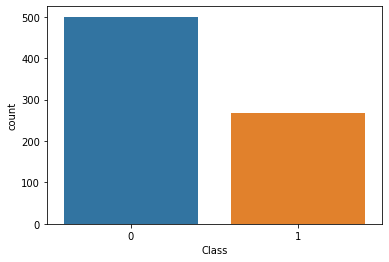

In [ ]:
# Gráfico de contagem de resultados
sns.countplot(x = 'Class',data = df)

### Histograma de cada característica

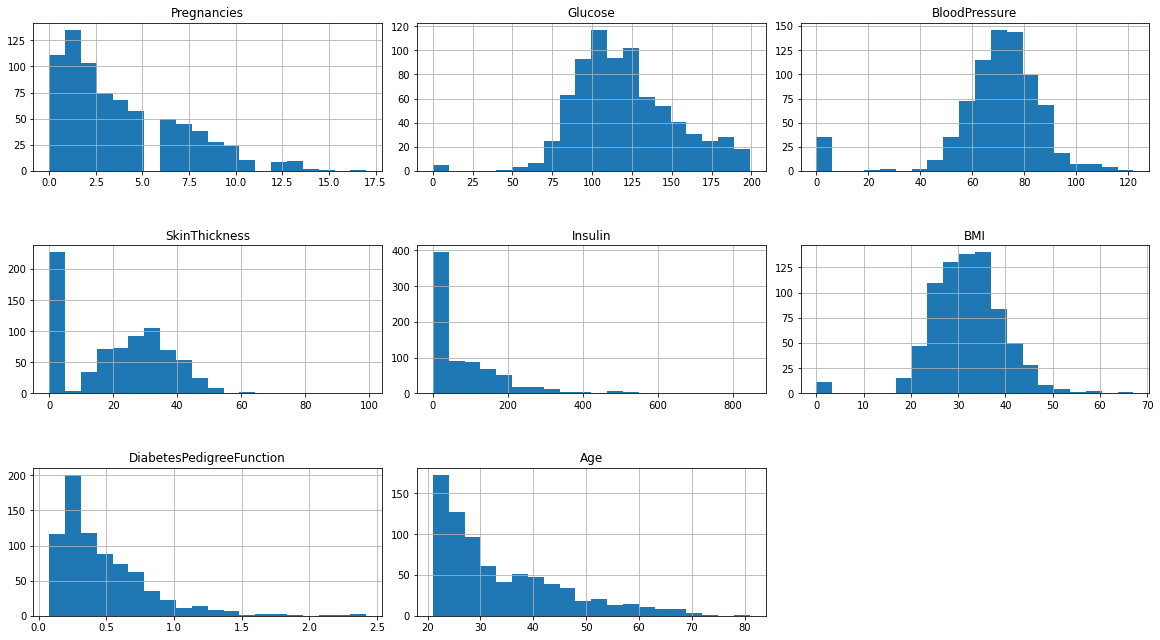

In [ ]:
# Histograma de cada característica
import itertools
col = df.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)
for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    df[i].hist(bins = 20)
    plt.title(i)
plt.show()

### Gráfico de pares

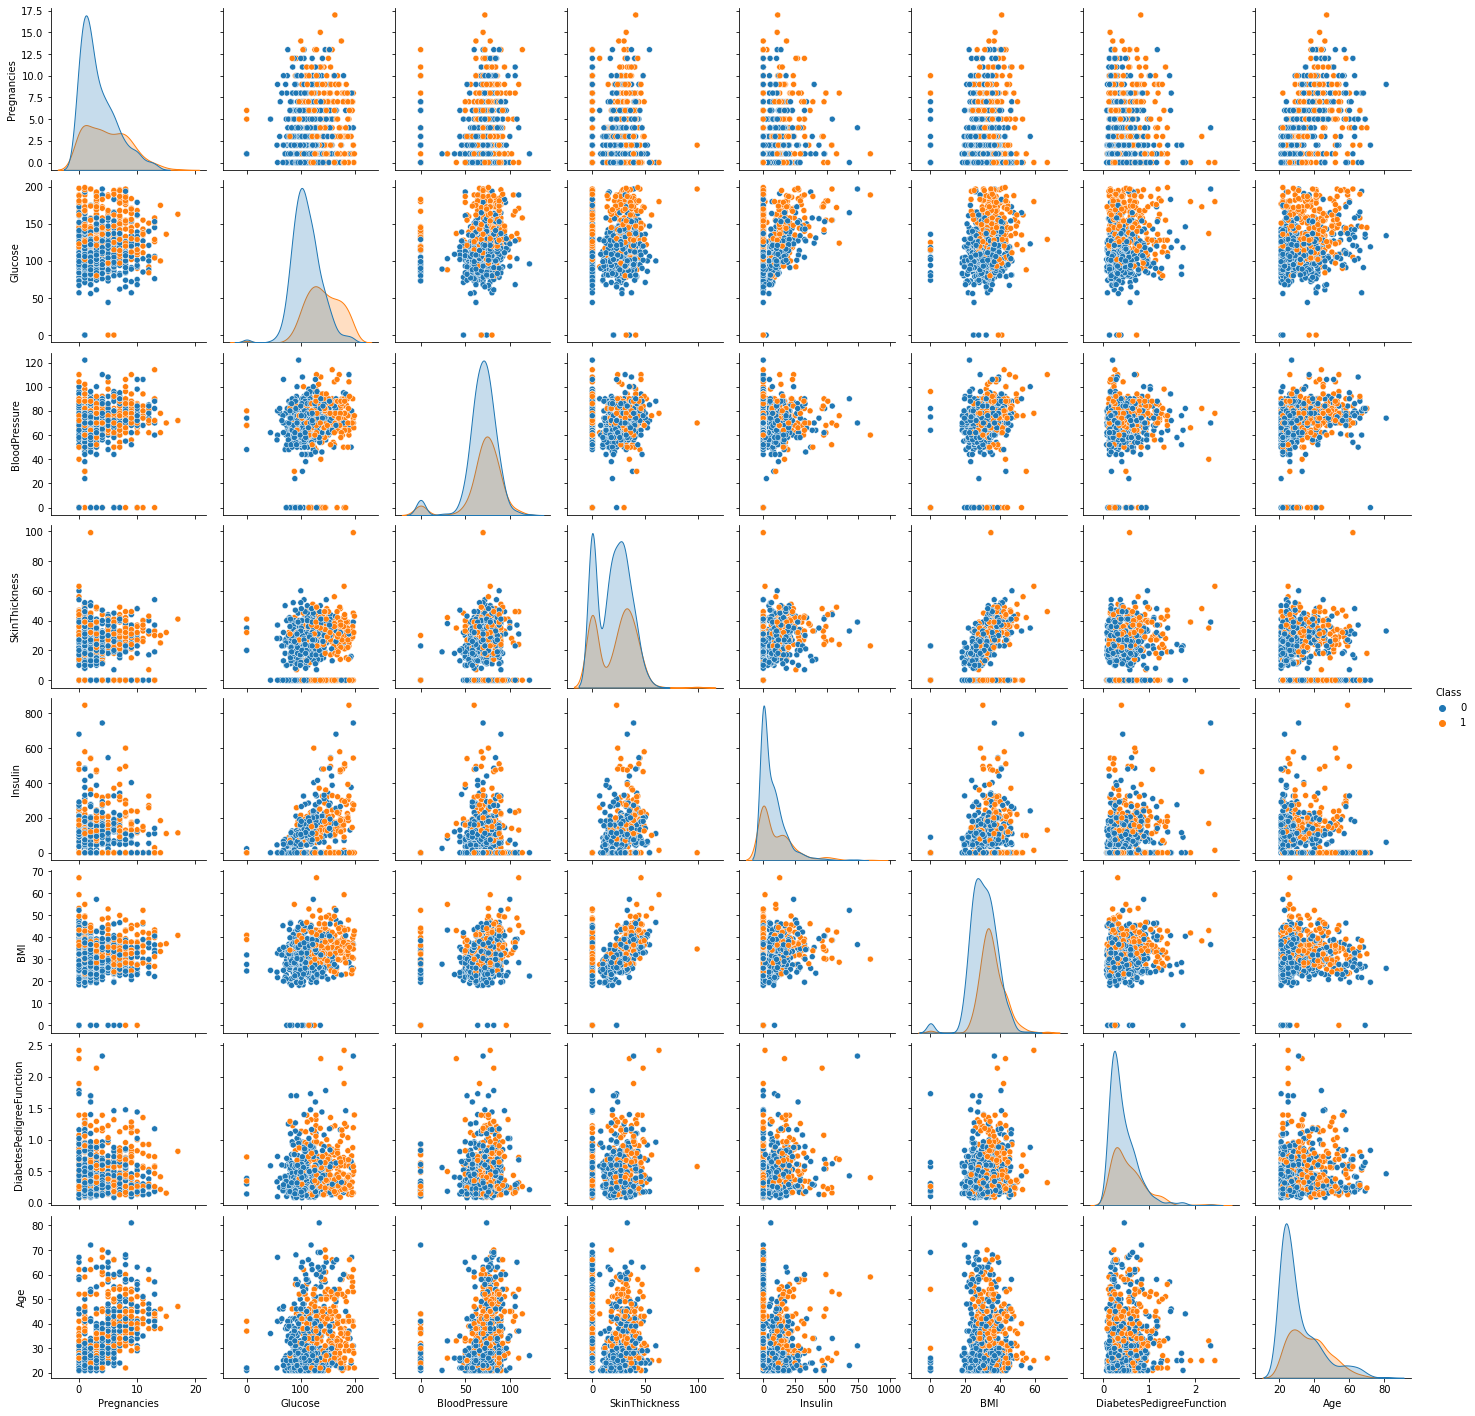

In [ ]:
sns.pairplot(data = df, hue = 'Class')
plt.show()

### Função <strong>Data_Process()</strong> normaliza os dados e faz a divisão do dataset em treino e teste retornando: X_Train, X_Test, Y_Train, Y_Test

## Importa o train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def Data_Process():
    col_norm =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

    # Normalização usando uma função Lambda personalizada
    df1_norm = df[col_norm].apply(lambda x :( (x - x.min()) / (x.max()-x.min()) ) )

    X_Data = df1_norm
    Y_Data = df["Class"]

    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data,Y_Data, test_size=0.3,random_state=101)

    return X_Train, X_Test, Y_Train, Y_Test

## Função <strong>create_feature_column()</strong> retorna as colunas de recursos, ou seja, as features

In [ ]:
def create_feature_column():

    feat_Pregnancies = tf.feature_column.numeric_column('Pregnancies')
    feat_Glucose = tf.feature_column.numeric_column('Glucose')
    feat_BloodPressure = tf.feature_column.numeric_column('BloodPressure')
    feat_SkinThickness_tricep = tf.feature_column.numeric_column('SkinThickness')
    feat_Insulin = tf.feature_column.numeric_column('Insulin')
    feat_BMI = tf.feature_column.numeric_column('BMI')
    feat_DiabetesPedigreeFunction = tf.feature_column.numeric_column('DiabetesPedigreeFunction')

    feature_column = [feat_Pregnancies, feat_Glucose, feat_BloodPressure,
                  feat_SkinThickness_tricep, feat_Insulin,
                 feat_BMI , feat_DiabetesPedigreeFunction]

    return feature_column

## Divide os dados em 80% dos dados para treino e 30% para teste através da função <strong>Data_Process()</strong>

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = Data_Process()

## Chama a função que definimos mais acima <strong>create_feature_column()</strong> que retorna as features

In [ ]:
feature_column = create_feature_column()

## O <strong>pandas_input_fn()</strong> retorna a função de entrada que vai alimentar o DataFrame Pandas no modelo

Vamos usar a <strong>input_func</strong> para treinar o modelo e a <strong>eval_func</strong> para testar o modelo

In [ ]:
input_func = tf.estimator.inputs.pandas_input_fn(X_Train,
                                                 Y_Train,
                                                 batch_size = 50,
                                                 num_epochs = 1000,
                                                 shuffle = True)

eval_func = tf.estimator.inputs.pandas_input_fn(X_Test,
                                               Y_Test,
                                               batch_size = 50,
                                               num_epochs = 1,
                                               shuffle = False)

In [ ]:
predict_input_fn = tf.estimator.inputs.pandas_input_fn(
      x = X_Test,
      num_epochs = 1,
      shuffle = False)

## Cria o modelo DNN ( <strong>Deep Neural Network</strong> )

In [ ]:
dnnmodel = tf.estimator.DNNClassifier(
                                        hidden_units = [20,20],
                                        feature_columns = feature_column,
                                        n_classes = 2,
                                        activation_fn = tf.nn.softmax,
                                        dropout = None,
                                        optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
                                    )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpfn2dyftm', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


## Treino do modelo

In [ ]:
history = dnnmodel.train(input_fn = input_func, steps = 500)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpfn2dyftm/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 33.97522, step = 1
INFO:tensorflow:global_step/sec: 240.286
INFO:tensorflow:loss = 31.802942, step = 101 (0.420 sec)
INFO:tensorflow:global_step/sec: 288.425
INFO:tensorflow:loss = 23.145737, step = 201 (0.349 sec)
INFO:tensorflow:global_step/sec: 333.369
INFO:tensorflow:loss = 23.793764, step = 301 (0.297 sec)
INFO:tensorflow:global_step/sec: 319.646
INFO:tensorflow:loss = 21.74504, step = 401 (0.319 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 500...
INFO:tensorflow:Saving checkp

## Teste do modelo

In [ ]:
dnnmodel.evaluate(eval_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-05-20T01:38:26Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpfn2dyftm/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.37982s
INFO:tensorflow:Finished evaluation at 2021-05-20-01:38:26
INFO:tensorflow:Saving dict for global step 500: accuracy = 0.77922076, accuracy_baseline = 0.64935064, auc = 0.84320986, auc_precision_recall = 0.74527776, average_loss = 0.46556053, global_step = 500, label/mean = 0.35064936, loss = 21.508896, precision = 0.7027027, prediction/mean = 0.33999133, recall = 0.6419753
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 500: /tmp/tmpfn2dyftm/model.ckpt-500


{'accuracy': 0.77922076,
 'accuracy_baseline': 0.64935064,
 'auc': 0.84320986,
 'auc_precision_recall': 0.74527776,
 'average_loss': 0.46556053,
 'global_step': 500,
 'label/mean': 0.35064936,
 'loss': 21.508896,
 'precision': 0.7027027,
 'prediction/mean': 0.33999133,
 'recall': 0.6419753}

## Predições

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
predictions = list(dnnmodel.predict(input_fn = predict_input_fn))
prediction = [p["class_ids"][0] for p in predictions]
data = classification_report(Y_Test, prediction)
conmat = confusion_matrix(Y_Test, prediction)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpfn2dyftm/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


## Análise

## Instala no notebook o scikit-plot

OBS. <strong>Basta rodar uma vez, por isso tá comentado, se quiser instalar é só descomentar</strong>

In [ ]:
!pip install scikit-plot

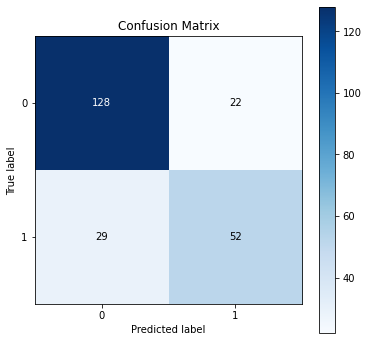

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(Y_Test,
                                    prediction,
                                   figsize = (6,6),
                                   title = "Confusion Matrix")

In [ ]:
print(data)

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       150
           1       0.70      0.64      0.67        81

    accuracy                           0.78       231
   macro avg       0.76      0.75      0.75       231
weighted avg       0.78      0.78      0.78       231

